In [1]:
# %pip install tensorflow==2.12.0 scikit-learn numpy pandas==1.5.2 rich==13.3.3 matplotlib


In [2]:
# %pip install ta==0.10.2 yfinance==0.2.13

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2978044185517808934
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9383706624
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16064899322989266217
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [4]:
import tensorflow as tf
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

/device:GPU:0
Num GPUs Available:  1


In [5]:
tf.version.VERSION

'2.10.0'

In [6]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from ta import add_all_ta_features
import ta
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [7]:
# Load the Bitcoin price data
bitcoin_data = pd.read_csv(r'C:\Users\MrBios\Documents\Development\test\csv\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')  # Replace "bitcoin_data.csv" with your actual data file
bitcoin_data.dropna(inplace=True)

In [8]:
# Calculate technical indicators using TA-Lib
bitcoin_data["RSI"] = ta.momentum.RSI(bitcoin_data["Close"])
bitcoin_data["MACD"], bitcoin_data["MACD_SIGNAL"], _ = ta.MACD(bitcoin_data["Close"])

AttributeError: module 'ta.momentum' has no attribute 'RSI'

In [ ]:
# remove timestamp column
bitcoin_data.drop(columns=["Timestamp"], inplace=True)

In [ ]:
# get last 10000 rows
bitcoin_data = bitcoin_data.tail(10000)

In [ ]:
# Prepare the data for training
scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(bitcoin_data[["Close", "RSI", "MACD", "MACD_SIGNAL"]])
scaled_data = scaler.fit_transform(bitcoin_data[["Close"]])

# Create sequences of data with a given time step
time_step = 30  # Number of previous time steps to consider for predicting the next time step
X = []
y = []
for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i - time_step:i, :])
    y.append(scaled_data[i, 0])
X = np.array(X)
y = np.array(y)

# Reshape X to match the expected input shape of the model
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)	
# Compile the model


Epoch 1/50


225/225 [==============================] - 4s 9ms/step - loss: 0.0109 - val_loss: 4.3718e-04
Epoch 2/50
225/225 [==============================] - 2s 7ms/step - loss: 0.0029 - val_loss: 3.0294e-04
Epoch 3/50
225/225 [==============================] - 2s 7ms/step - loss: 0.0026 - val_loss: 5.3802e-04
Epoch 4/50
225/225 [==============================] - 2s 7ms/step - loss: 0.0024 - val_loss: 6.2716e-04
Epoch 5/50
225/225 [==============================] - 2s 7ms/step - loss: 0.0021 - val_loss: 3.3099e-04
Epoch 6/50
225/225 [==============================] - 2s 7ms/step - loss: 0.0019 - val_loss: 5.5595e-04
Epoch 7/50
225/225 [==============================] - 2s 7ms/step - loss: 0.0017 - val_loss: 5.9208e-04
Epoch 8/50
160/225 [====================>.........] - ETA: 0s - loss: 0.0019

: 

: 

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
250/250 [==============================] - 2s 8ms/step - loss: 4.9908e-04 - val_loss: 1.0175e-04
Epoch 2/50
250/250 [==============================] - 2s 8ms/step - loss: 5.6321e-04 - val_loss: 4.5920e-04
Epoch 3/50
250/250 [==============================] - 2s 7ms/step - loss: 5.2127e-04 - val_loss: 1.0786e-04
Epoch 4/50
250/250 [==============================] - 2s 7ms/step - loss: 5.2611e-04 - val_loss: 2.0598e-04
Epoch 5/50
250/250 [==============================] - 2s 7ms/step - loss: 5.0537e-04 - val_loss: 1.0491e-04
Epoch 6/50
250/250 [==============================] - 2s 7ms/step - loss: 5.0952e-04 - val_loss: 8.8225e-05
Epoch 7/50
250/250 [==============================] - 2s 7ms/step - loss: 5.4753e-04 - val_loss: 1.0824e-04
Epoch 8/50
250/250 [==============================] - 2s 7ms/step - loss: 5.0068e-04 - val_loss: 9.7289e-05
Epoch 9/50
250/250 [==============================] - 2s 7ms/step - loss: 4.9617e-04 - val_loss: 1.6615e-04
Epoch 10/50
250/250 [=======

In [ ]:
# Make predictions
predictions = model.predict(X_test)

63/63 [==============================] - 1s 2ms/step


In [ ]:

# Scale the predictions back to original values
predictions = scaler.inverse_transform(predictions)


In [ ]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 55248.880513682576


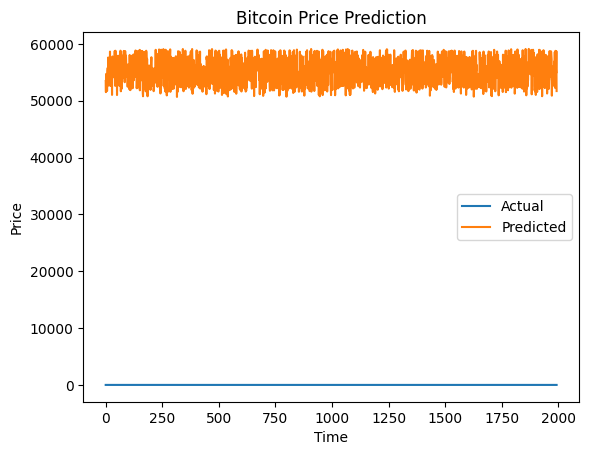

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(y_test, label='Actual')

# Plot the predicted values
plt.plot(predictions, label='Predicted')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
